In [1]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt  # type: ignore
np.random.seed(42)

A Perceptron cannot seperate points generated by the XOR function, as the XOR produces a linearly non-seperable dataset.

In [3]:
x_train = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1,1]
])

In [7]:
y_train = np.array([0, 1, 1,  0])

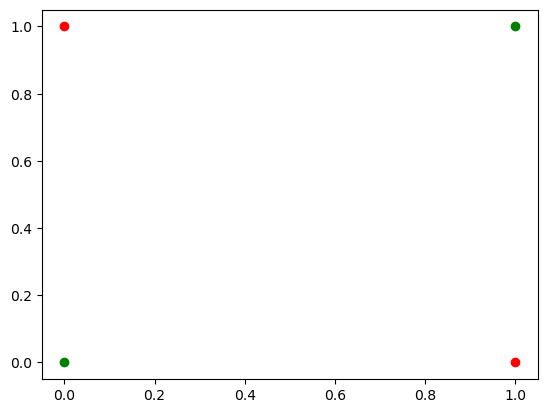

In [8]:
for i in range(4):
    if (y_train[i] == 0):
        plt.scatter(x_train[i][0], x_train[i][1], color = 'green')
    else:
        plt.scatter(x_train[i][0], x_train[i][1], color = 'red')
plt.show()

In [9]:
# Let's train a perceptron and be sure that it does not word for XOR
MAX_EPOCHS = 1000
min_accuracy = 0.99
weights = np.zeros(3)
for epoch in range(MAX_EPOCHS):
    num_correct = 0
    for i in range(4):
        x, y = x_train[i], y_train[i]
        x_tilde = np.append(x, 1)
        y_hat = np.sign(np.dot(weights, x_tilde))
        if (y_hat != y):
            weights = weights + y * x_tilde
        else:
            num_correct += 1
    accuracy = num_correct / 4
    if (accuracy > min_accuracy):
        break


In [10]:
# Print the accuracy of the model
print(f"The accuracy acheived by Perceptron in modelling the XOR function is {accuracy}")

The accuracy acheived by Perceptron in modelling the XOR function is 0.5


As we can see, Perceptron failes spectacularly in predicting the XOR function

In [11]:
def ReLU(x):
  output_vector = np.empty_like(x)
  for idx, value in enumerate(output_vector):
    output_vector[idx] = max(value, 0)
  return output_vector

In [12]:
def ReLU_derivative(x):
    if (x <= 0):
        return 0
    return 1

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
def sidmoid_derivative(x):
    sigmoid_value = sigmoid(x)
    return sigmoid_value * (1 - sigmoid_value)

Output of forward pass:
$ a_1^2 = \phi_2 (W^2 \phi_1(W^1 x)) $ where, <br>
$\phi_1$ and $\phi_2$ are activation layers and $W^2$ and $W^1$ are weight matrices.

In [15]:
def forward_pass(weights, x_input):
    '''
    args:
    weights: list of weight matrices for each layer
    x_input: input vector
    '''
    output_vector = sigmoid(np.matmul(weights[1], ReLU(np.matmul(weights[0], x_input))))
    return output_vector

In [16]:
# Testing the forward function
weights = []
weights.append(np.array([[0.123, 0.135], [0.454, 0.983]]))
weights.append(np.array([0.55, 1.234]))
output = forward_pass(weights, x_train[2])
print(output)

0.6341355910108007


In [17]:
def predictLabel(x):
    ''' 
        x: output of the forward pass (a scaler)
        return value: label (0 or 1), commonly known as y_hat
    '''
    if (x <= 0.5):
        return 0
    return 1

In [18]:
def binaryCrossEntropyLoss(true_label, output_of_neural_network):
    return -(true_label * np.log(output_of_neural_network) + (1 - true_label) * np.log(1 - output_of_neural_network))

In [19]:
def backprop(weights):
    ''' 
        This function edits the weight matrices for each layer, according to the gradient descent algorithm
    '''
    return 1

In [ ]:
def train(weights, x_train, y_train):
    ''' 
        Trains the weights according to the gradient descent algorithm.  
    '''
    for idx, input_vector in enumerate(x_train):
        output_vector = forward_pass(weights, input_vector)
        predicted_label = predictLabel(output_vector)
        real_label = y_train[idx]
